In [1]:
# Importation de la bibliothèque pandas pour la manipulation de données
import pandas as pd

# Importation de la bibliothèque matplotlib.pyplot pour la création de graphiques
import matplotlib.pyplot as plt

# Importation de la bibliothèque seaborn pour rendre les graphiques plus esthétiques
import seaborn as sns

# Importation de la classe Normalize du module colors de Matplotlib
from matplotlib.colors import Normalize

# Importation de la palette de couleurs viridis de Matplotlib
from matplotlib.cm import viridis

import numpy as np

from matplotlib.cm import get_cmap


In [2]:
# Chargement des données depuis le fichier Excel
excel_file_path = '../../DataSet/data_fifa_clean.xlsx'
df = pd.read_excel(excel_file_path)

In [3]:
# Graphique 1 : Moyenne d'âge des joueurs par poste:

def age_moyen_par_poste():
    # Calcul de la moyenne d'âge des joueurs pour chaque poste et tri par ordre décroissant
    age_moyen_par_poste = df.groupby('GroupPositions')['Age'].mean().sort_values(ascending=False)
    
    # Création d'une figure de taille personnalisée
    plt.figure(figsize=(12, 10))
    
    # Création d'un boxplot pour visualiser la distribution de l'âge par poste
    ax = sns.boxplot(x='GroupPositions', y='Age', data=df, palette='Set2')
    
    # Ajout du titre du graphique
    ax.set_title('Moyenne d\'âge des joueurs par groupes de poste')
    
    # Ajout d'étiquettes pour les axes x et y
    ax.set_xlabel('Poste')
    ax.set_ylabel('Âge')
    
    # Personnalisation des étiquettes de l'axe y avec des valeurs discrètes
    plt.yticks(range(int(df['Age'].min()), int(df['Age'].max()) + 1))
    
    # Personnalisation des étiquettes d'axe x en les faisant pivoter de 45 degrés 
    plt.xticks(rotation=45, ha='right')
    
    # Ajustement automatique de la disposition du graphique pour éviter la superposition des éléments
    plt.tight_layout()
    
    # Affichage du graphique
    plt.show()

C:\Users\konan\AppData\Local\Temp\ipykernel_26172\1548217431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='GroupPositions', y='Age', data=df, palette='Set2')


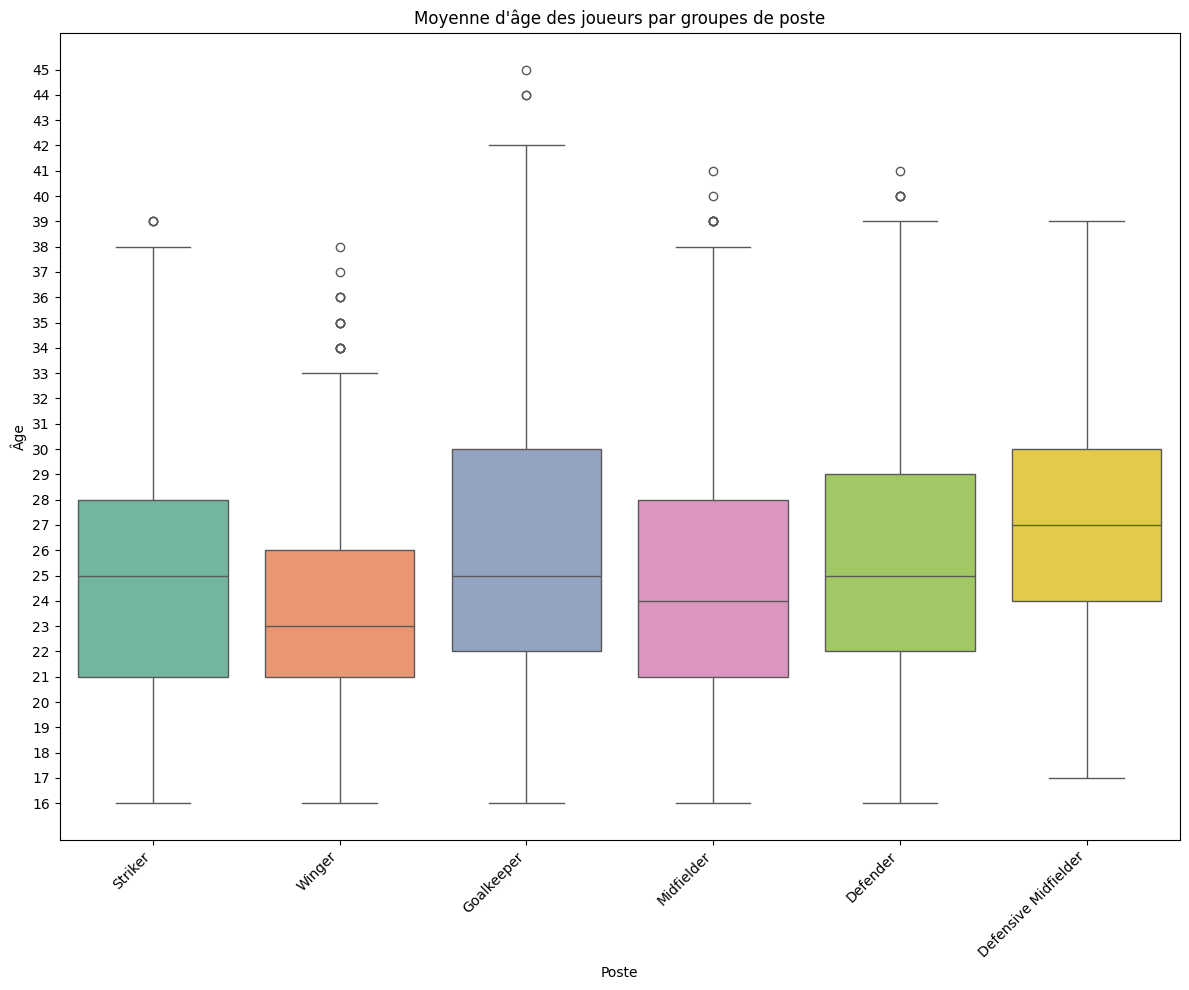

In [4]:
# Appel de la fonction 
age_moyen_par_poste()

In [5]:
# Graphique 2 : Évolution moyenne des salaires en fonction de l'ancienneté

def evolution_salaire_anciennete():
    # Création d'une figure de taille personnalisée
    plt.figure(figsize=(12, 6))
    
    # Traçage d'une ligne pour représenter l'évolution moyenne des salaires en fonction de l'âge
    sns.lineplot(x='Age', y='Wage', data=df, ci=None, color='purple', marker='o')
    
    # Ajout du titre du graphique
    plt.title('Évolution Moyenne des Salaires en Fonction de l\'Ancienneté')
    
    # Ajout d'étiquettes pour les axes x et y
    plt.xlabel('Âge du Joueur')
    plt.ylabel('Salaire Moyen (Wage)')
    
    # Personnalisation des valeurs de l'axe y avec des incréments de 500
    plt.yticks(range(0, 20001, 500))
    
    # Ajustement automatique de la disposition du graphique pour éviter la superposition des éléments
    plt.tight_layout()
    
    # Affichage du graphique
    plt.show()


C:\Users\konan\AppData\Local\Temp\ipykernel_26172\4010677752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='Wage', data=df, ci=None, color='purple', marker='o')


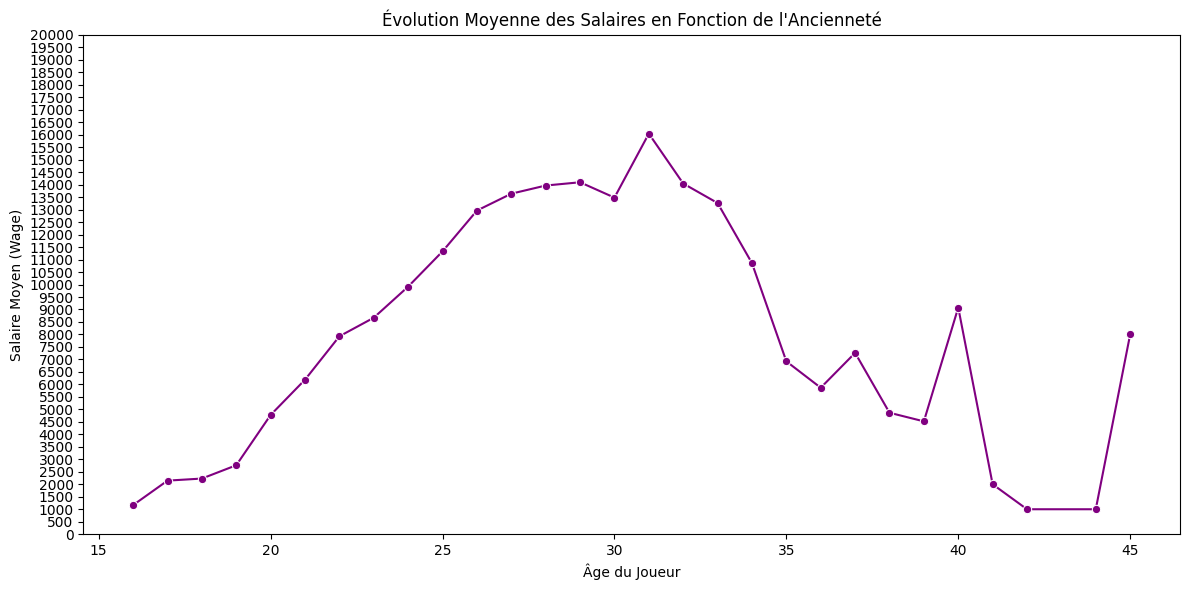

In [6]:
# Appel de la fonction 
evolution_salaire_anciennete()

In [7]:
# Graphique 3 : Répartition des pieds d'agilité des joueurs en fonction de leur poste

def repartition_pied_agilite_par_poste():
    # Sélection des colonnes pertinentes du DataFrame
    df_pied_agilite = df[['Position', 'Preferred Foot']]
    
    # Création d'une liste unique des positions (filtrage des valeurs non nulles)
    positions_uniques = [position for position in df['Position'].unique() if pd.notnull(position)]
    
    # Création d'une liste unique des pieds préférés (filtrage des valeurs non nulles)
    pieds_uniques = [pied for pied in df['Preferred Foot'].unique() if pd.notnull(pied)]
    
    # Définition de la disposition des sous-plots
    num_rows = int(np.ceil(len(positions_uniques) / 2))
    num_cols = 2
    
    # Création de sous-plots avec une figure de taille personnalisée
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
    
    # Ajustement de l'espacement entre les sous-plots
    plt.subplots_adjust(hspace=0.5)
    
    # Iteration sur les positions et création d'un diagramme en secteurs pour chaque poste
    for i, position in enumerate(positions_uniques):
        # Sélection des données pour la position spécifiée
        data = df_pied_agilite[(df_pied_agilite['Position'] == position) & (df_pied_agilite['Preferred Foot'].notnull())]['Preferred Foot'].value_counts()
        
        # Couleurs pour les parts de pizza
        colors = ['#FF9999', '#66B2FF']
        
        # Explosion de la part correspondant au pied préféré
        explode = tuple(0.1 for _ in range(len(data)))
        
        # Création d'un diagramme en secteurs (camembert) pour chaque poste
        ax = axes[i // num_cols, i % num_cols]
        ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
        
        # Ajout du cercle au centre pour donner l'effet d'un trou dans le camembert
        centre_cercle = plt.Circle((0, 0), 0.70, fc='white')
        ax.add_artist(centre_cercle)
        
        # Ajout du titre au graphique
        ax.set_title(f'Répartition des Pieds d\'Agilité - {position}', fontsize=14)
    
    # Affichage de la figure avec tous les sous-plots
    plt.show()

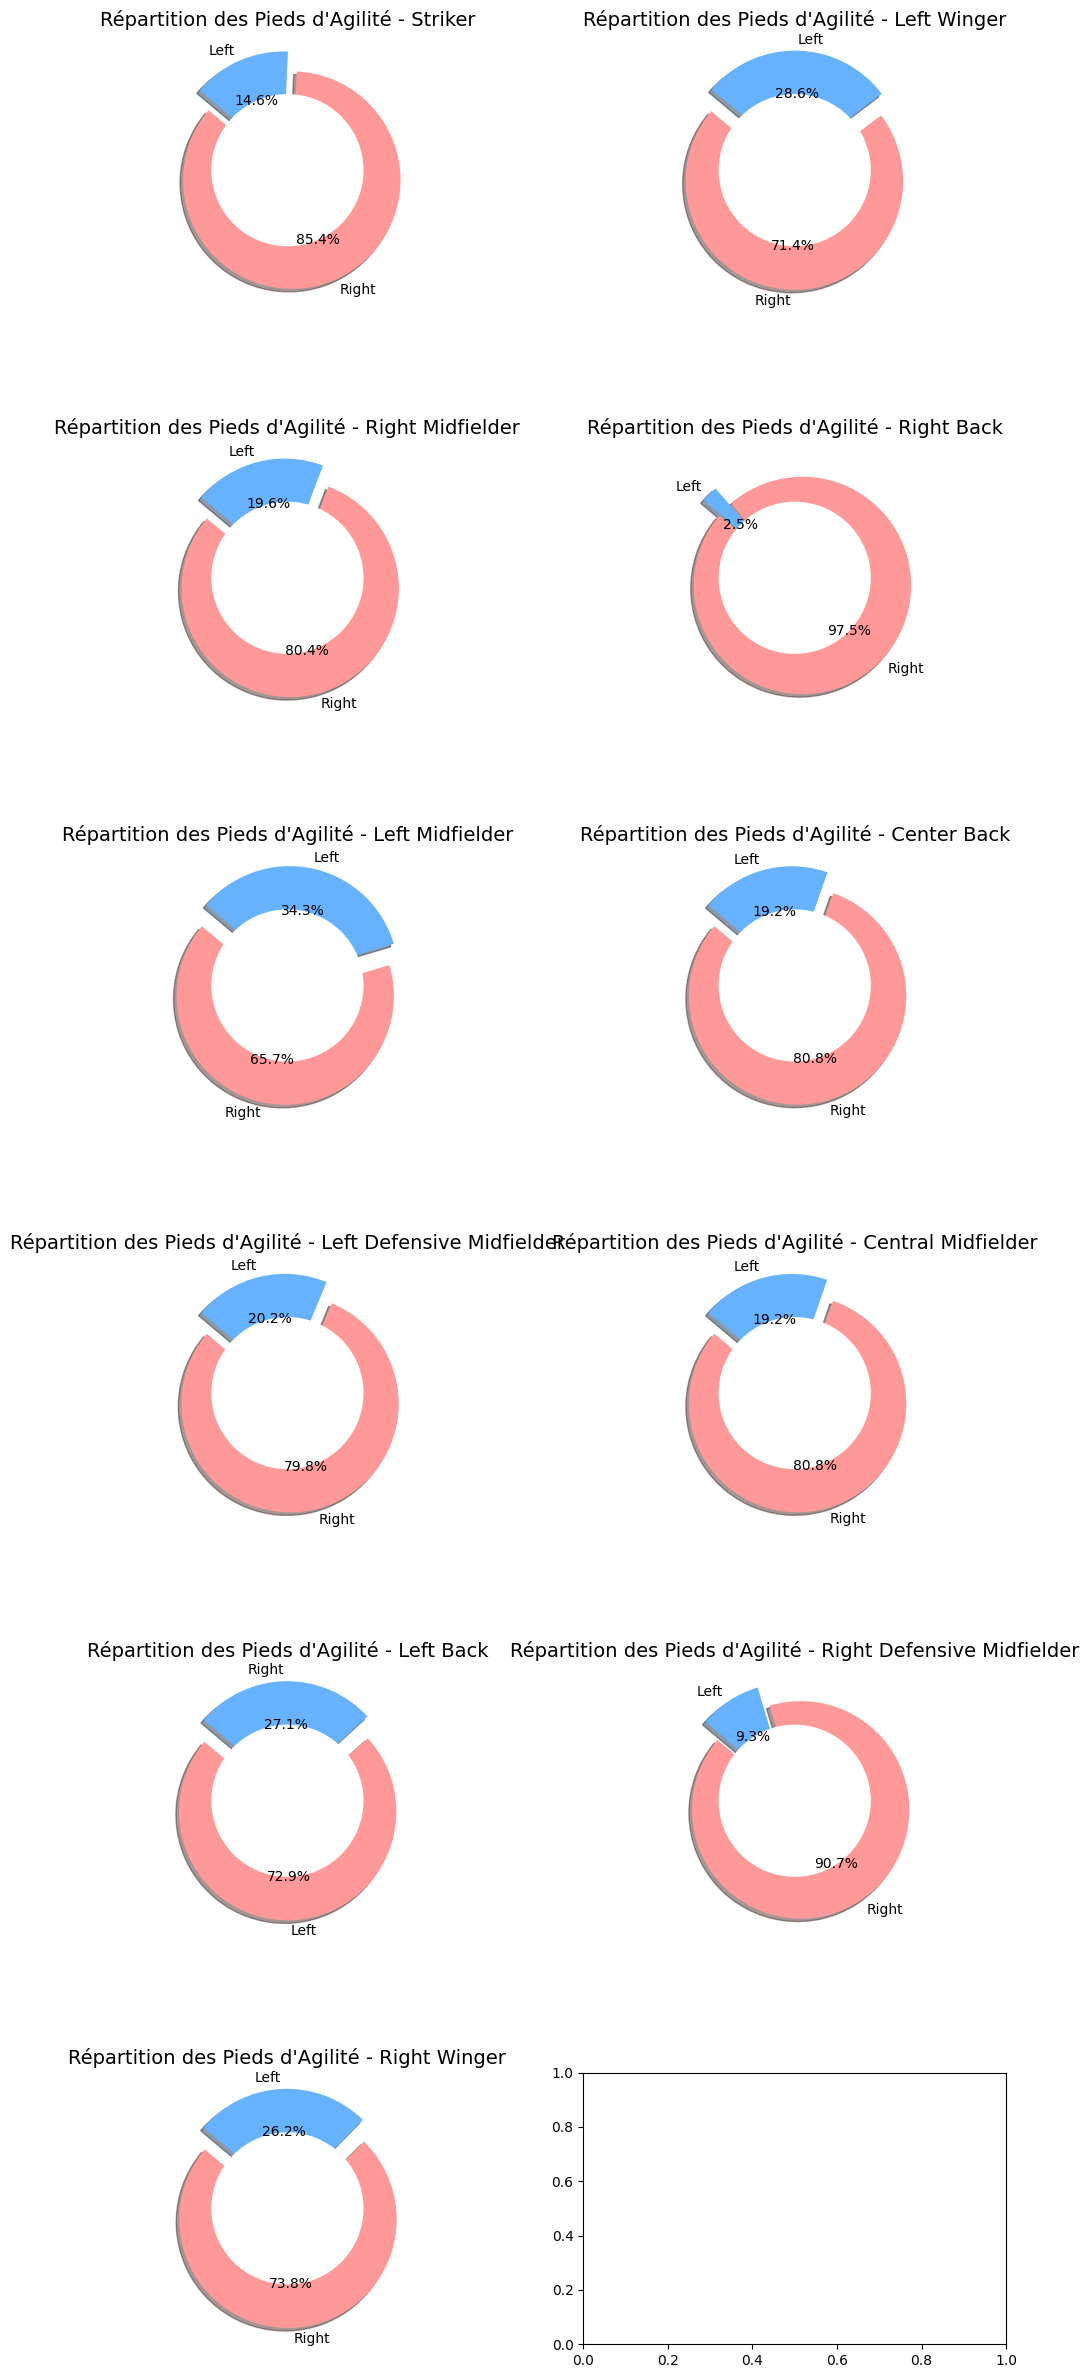

In [8]:
# Appel de la fonction 
repartition_pied_agilite_par_poste()

In [33]:
# Graphique 5 : Répartition des joueurs par nationalité (Top 10)

def repartition_joueurs_par_nationalite():
    # Comptage du nombre de joueurs par nationalité (Top 10)
    nationalite_counts = df['Nationality'].value_counts().head(10)
    
    # Création d'un graphique en secteurs (camembert) pour représenter la répartition
    plt.figure(figsize=(10, 10))
    plt.pie(nationalite_counts, labels=nationalite_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    
    # Ajout du titre au graphique
    plt.title('Répartition des Joueurs par Nationalité (Top 10)')
    
    # Affichage du graphique
    plt.show()


def repartition_joueurs_par_nationalite():
    # Comptage du nombre de joueurs par nationalité (Top 10)
    nationalite_counts = df['Nationality'].value_counts().head(10)
    
    # Définir une palette de couleurs voisine de Viridis
    colors = plt.cm.plasma(np.linspace(0, 1, len(nationalite_counts)))
    
    # Création d'un graphique en secteurs (camembert) pour représenter la répartition
    plt.figure(figsize=(10, 10))
    plt.pie(nationalite_counts, labels=nationalite_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

    # Ajouter un effet de nuage de points (scatter) avec la même palette de couleurs
    scatter_colors = plt.cm.plasma(np.linspace(0, 1, len(nationalite_counts)))
    plt.scatter([0] * len(nationalite_counts), [0] * len(nationalite_counts), c=scatter_colors, label='Nationalité')

    # Ajout du titre au graphique
    plt.title('Répartition des Joueurs par Nationalité (Top 10)')

    # Affichage du graphique
    plt.show()

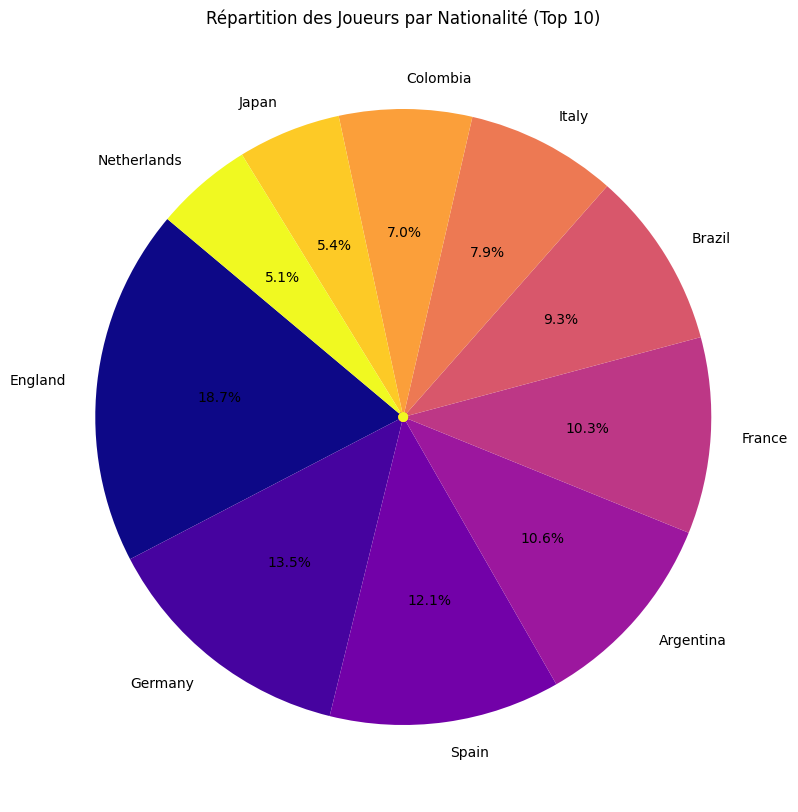

In [34]:
# Appel de la fonction 
repartition_joueurs_par_nationalite()

In [11]:
# Graphique 6 : Classement des 20 joueurs les plus populaires par pays

def classement_joueurs_populaires():
        # Tri du DataSet par la colonne 'International Reputation' de manière décroissante
        df_sorted = df.sort_values('International Reputation', ascending=False)

        # Sélection des joueurs les plus populaires de chaque pays (les 20 premiers de chaque nationalité)
        top_players_by_nationality = df_sorted.groupby('Nationality').head(1).head(20)

        # Création d'un diagramme à barres pour représenter la popularité des joueurs par pays
        plt.figure(figsize=(12, 6))
        plt.bar(
        top_players_by_nationality['Name'] + ' (' + top_players_by_nationality['Nationality'] + ')',
        top_players_by_nationality['International Reputation'],
        color='orange'
        )

        # Ajout du titre et des étiquettes
        plt.title('Classement des 20 Joueurs les Plus Populaires par Pays')
        plt.xlabel('Joueur')
        plt.ylabel('Popularité (International Reputation)')

        # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
        plt.xticks(rotation=45, ha='right')

        # Ajustement de la mise en page pour éviter les coupures
        plt.tight_layout()

        # Affichage du graphique
        plt.show()

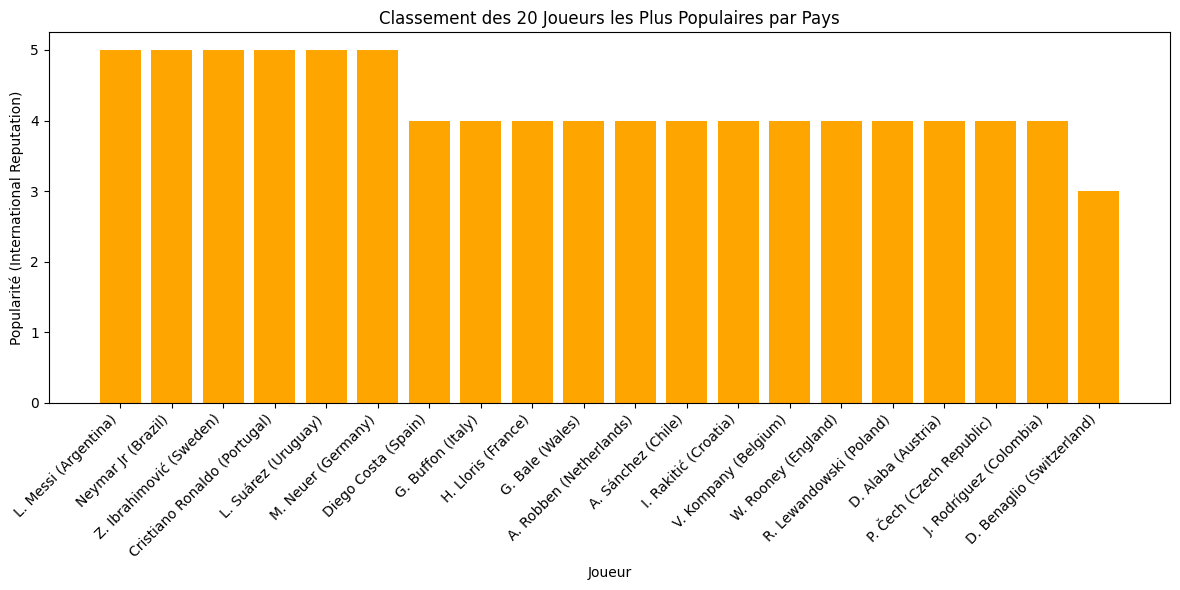

In [12]:
# Appel de la fonction 
classement_joueurs_populaires()

In [13]:
# Graphique 7 : Vue globale du nombre de joueurs par poste

def vue_globale_nombre_joueurs_par_poste():
    # Calcul du nombre de joueurs par poste
    poste_counts = df['Position'].value_counts()
    
    # Création du graphique
    plt.figure(figsize=(10, 6))
    
    # Traçage du graphique en barres avec une couleur spécifique
    poste_counts.plot(kind='bar', color='firebrick')
    
    # Ajout des étiquettes et du titre au graphique
    plt.title('Vue globale du nombre de joueurs par poste')
    plt.xlabel('Poste')
    plt.ylabel('Nombre de Joueurs')
    
    # Personnalisation des étiquettes de l'axe des abscisses (X) en les faisant pivoter de 45 degrés
    plt.xticks(rotation=45, ha='right')
    
    # Ajustement de la mise en page
    plt.tight_layout()
    
    # Affichage du graphique
    plt.show()

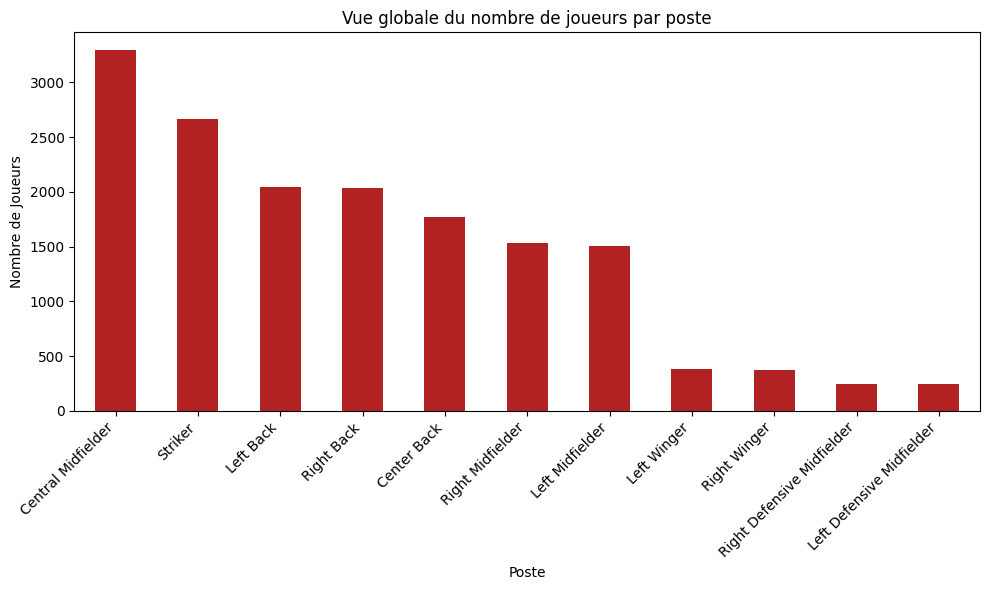

In [14]:
# Appel de la fonction 
vue_globale_nombre_joueurs_par_poste()

In [15]:
# Graphique 9 : Compétences moyennes par poste - Diagramme en Barres Groupées

def competences_moyennes_par_poste():
    # Liste des compétences à considérer
    competences = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                   'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                   'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots']
    
    # Calcul des moyennes des compétences par poste
    df_comp_par_poste = df.groupby('GroupPositions')[competences].mean().reset_index()
    
    # Normalisation des valeurs pour le radar (pourcentage)
    norm = Normalize(vmin=0, vmax=100)
    
    # Création du graphique en radar
    plt.figure(figsize=(12, 12))
    
    # Ajout d'un axe polar au graphique
    ax = plt.subplot(111, polar=True)
    
    # Nombre de compétences
    num_competences = len(competences)
    
    # Angles pour le radar
    angles = np.linspace(0, 2 * np.pi, num_competences, endpoint=False).tolist()
    angles += angles[:1]  # Fermeture du radar
    
    # Conversion des angles en degrés
    angles_deg = np.degrees(angles)
    
    # Création d'une colormap pour les compétences
    cmap = get_cmap("tab20c")
    
    # Traçage du radar pour chaque poste
    for i, row in df_comp_par_poste.iterrows():
        values = row[competences].tolist()
        values += values[:1]  # Fermeture du polygone
        color = cmap(i / len(df_comp_par_poste))
        ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=row['GroupPositions'])
    
    # Ajout des étiquettes pour chaque compétence
    ax.set_thetagrids(angles_deg[:-1], competences)
    
    # Ajout de la légende
    plt.legend(title='Poste', bbox_to_anchor=(0.5, -0.1), loc='upper center')
    
    # Ajout du titre au graphique
    plt.title('Compétences Moyennes par Poste - Diagramme en Radar', fontsize=16)
    
    # Affichage du graphique
    plt.show()


C:\Users\konan\AppData\Local\Temp\ipykernel_26172\2462748156.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab20c")


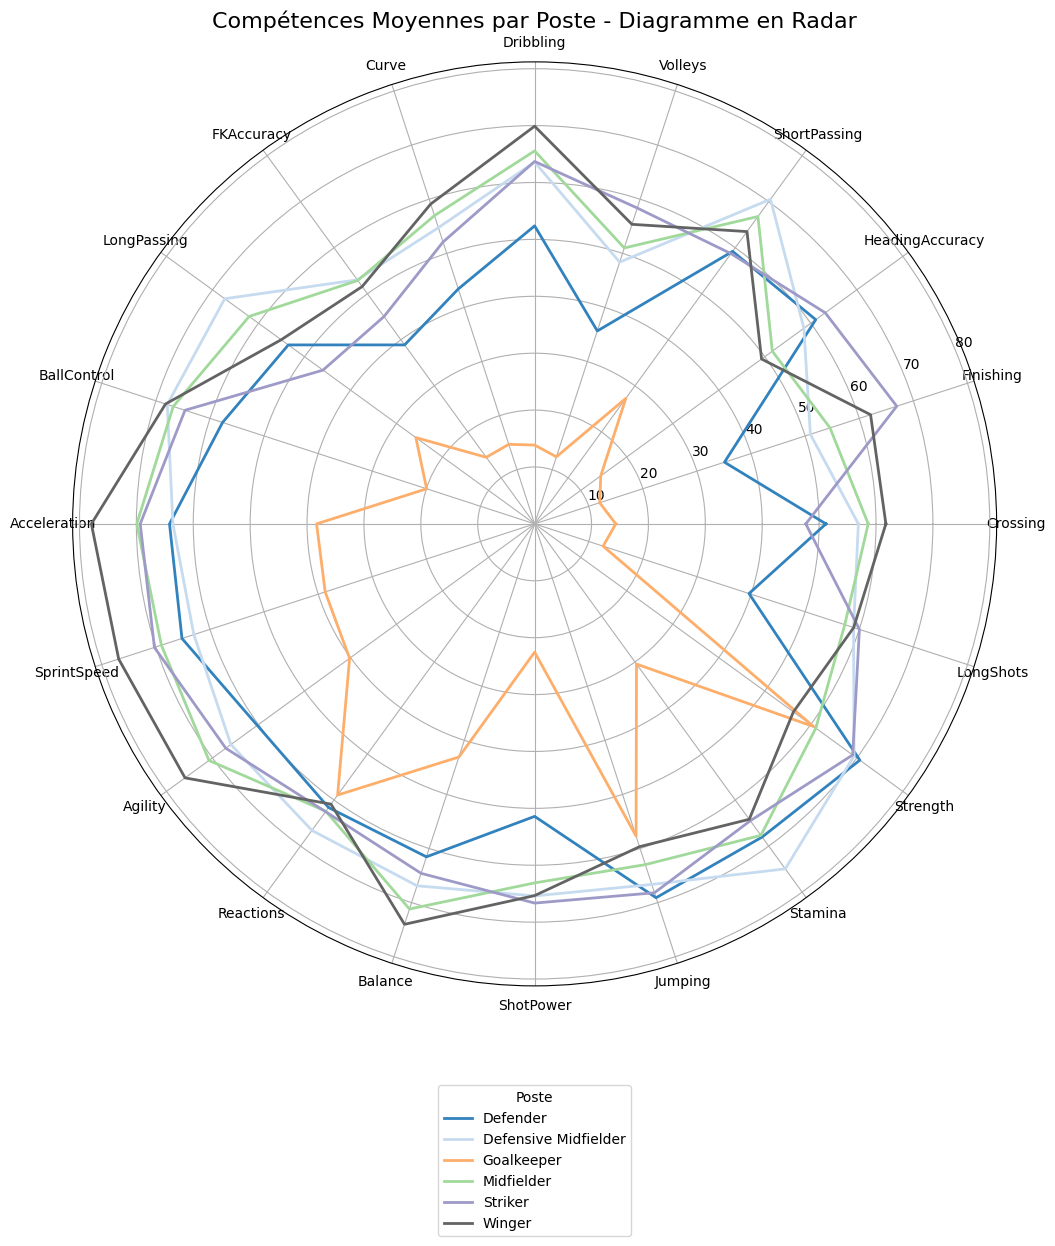

In [16]:
# Appel de la fonction 
competences_moyennes_par_poste()

In [17]:
# Graphique 10 : Top 10 des meilleurs buteurs

def top_buteurs():
    # Sélection des 20 meilleurs buteurs en fonction de la compétence "Finishing"
    top_10_buteurs = df.nlargest(20, 'Finishing')
    
    # Création du graphique
    plt.figure(figsize=(10, 6))
    
    # Création des barres du graphique
    bars = plt.bar(top_10_buteurs['Name'], top_10_buteurs['Finishing'], color='darkseagreen')
    
    # Ajout des annotations (nombre de buts) au-dessus de chaque barre
    for bar, buts in zip(bars, top_10_buteurs['Finishing']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
                 f'({buts})', ha='center', va='bottom')
    
    # Ajout des étiquettes aux axes et du titre au graphique
    plt.xlabel('Joueurs')
    plt.ylabel('Nombre de buts')
    plt.title('Top 10 des Meilleurs Buteurs')
    
    # Personnalisation des marques sur l'axe des x
    plt.xticks(rotation=45, ha='right')
    
    # Affichage du graphique
    plt.show()

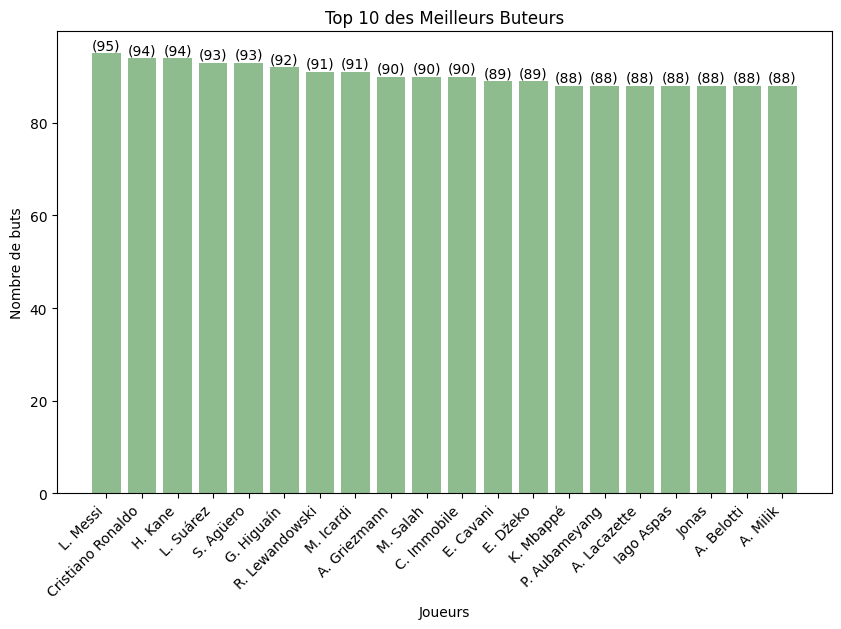

In [18]:
# Appel de la fonction 
top_buteurs()